In [ ]:
# Update list of files

import os
import boto3

# Define constants
bucket_name = "opensnpdata"
file_list_path = f"{data_directory}/class_data/opensnp_file_list.txt"

# Initialize the boto3 S3 client with the appropriate configuration
s3 = boto3.client("s3", config=boto3.session.Config(signature_version="s3v4"))

def update_file_list():
    """
    Retrieves the latest list of file keys from the S3 bucket and writes them to file_list_path.
    Uses a paginator to ensure that all objects are retrieved.
    """
    paginator = s3.get_paginator("list_objects_v2")
    file_keys = []
    
    # Iterate over each page of results
    for page in paginator.paginate(Bucket=bucket_name):
        if "Contents" in page:
            file_keys.extend([obj["Key"] for obj in page["Contents"]])
    
    # Write the file keys to file_list_path, one per line
    with open(file_list_path, "w") as f:
        for key in file_keys:
            f.write(key + "\n")
    
    print(f"Updated file list with {len(file_keys)} entries.")

# Run the update function
update_file_list()

<details>
  <summary>Click to see answer.</summary>
  
```
genome_length =   3435.71
num_rec = genome_length / 100
num_chr = 22
min_seg_len = 2.5
```

</details>

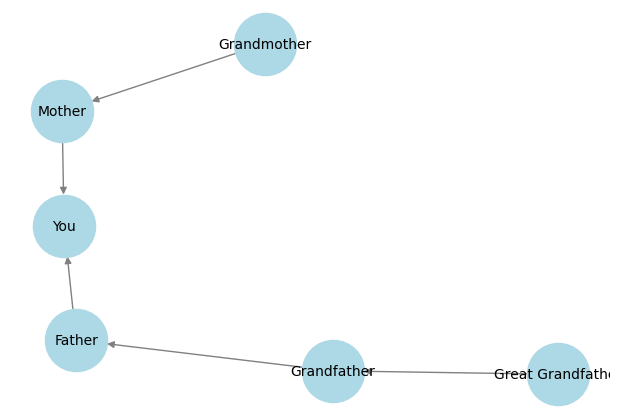

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph for a family tree
G = nx.DiGraph()

# Adding edges (relationships)
G.add_edges_from([
    ("Great Grandfather", "Grandfather"),
    ("Grandfather", "Father"),
    ("Father", "You"),
    ("Grandmother", "Mother"),
    ("Mother", "You")
])

# Draw the graph
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G, seed=42)  # Layout positions
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)

plt.show()
